In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

**Importing the dataset**

In [29]:
df=pd.read_csv('Social_Network_Ads.csv')

In [30]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [31]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [33]:
del df['User ID']

In [34]:
df['Gender']=df['Gender'].map({'Male':1,"Female":0})

**Splitting the dataset into the Training set and Test set**

In [35]:
x = df[['Gender', 'Age','EstimatedSalary']].values 
y = df['Purchased'].values 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

**Feature Scaling**

In [36]:
scaler = StandardScaler() 
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) 

**Fitting K-NN to the Training set**

In [37]:
KNN = KNeighborsClassifier(n_neighbors=7)

In [38]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Predicting the Test set results**

In [39]:
KNN.score(x_test, y_test)

0.9

In [40]:
y_pred=KNN.predict(x_test)

In [41]:
k1=pd.DataFrame(y_test,columns=['Y_test'])
k2=pd.DataFrame(y_pred,columns=['Y_pred'])
final=pd.concat((k1,k2),axis=1)
final

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
75,0,0
76,1,1
77,0,0
78,1,1


**Making the Confusion Matrix**

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  3],
       [ 5, 27]])

Text(42.0, 0.5, 'True')

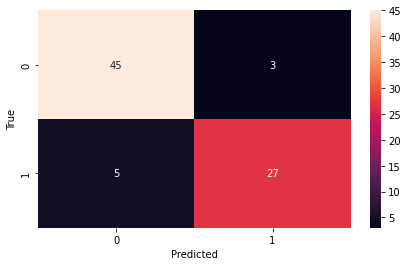

In [43]:
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')